In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

In [3]:
datasus = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv"
                      ,encoding='iso-8859-1',sep=';',skiprows=3,thousands='.',decimal=',')

In [4]:
datasus = datasus.iloc[:27]

In [35]:
datasus["2020/Ago"]

Unidade da Federação
Rondônia                10285455,78
Acre                              -
Amazonas                14726443,67
Roraima                  2826486,18
Pará                    39911193,02
Amapá                    2942273,94
Tocantins                8240261,38
Maranhão                28587541,78
Piauí                   23210624,20
Ceará                   59808605,59
Rio Grande do Norte     24929930,72
Paraíba                 22130016,81
Pernambuco              75704177,72
Alagoas                 19754741,78
Sergipe                 11014180,89
Bahia                   80793117,08
Minas Gerais           168024412,95
Espírito Santo          32188873,88
Rio de Janeiro          95274486,35
São Paulo              346512263,17
Paraná                 129375911,54
Santa Catarina          63972379,36
Rio Grande do Sul      101374341,51
Mato Grosso do Sul      19241624,02
Mato Grosso             17790649,87
Goiás                   43984702,05
Distrito Federal        26526196,39
Name: 2

In [5]:
datasus['Unidade da Federação'] = datasus['Unidade da Federação'].str.replace('\d+.','')

In [6]:
datasus = datasus.set_index('Unidade da Federação')

In [25]:
# sns.set(font_scale=1.4)
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

In [30]:
datasus.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,...,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,"10285455,78",9.291297e+08
Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,...,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,4.206680e+08
Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,"14726443,67",1.771655e+09
Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,"2826486,18",3.050109e+08
Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,24011712.48,...,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,"39911193,02",4.437116e+09


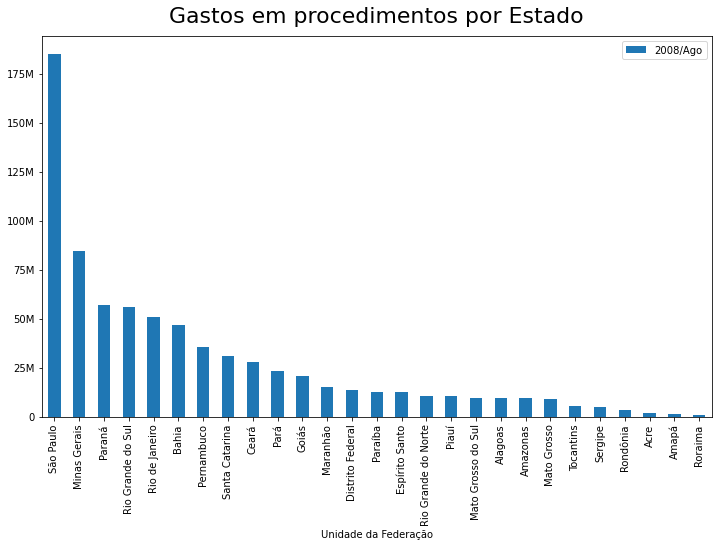

In [47]:
datasus["2008/Ago"].sort_values(ascending=False).plot(kind='bar',figsize=(12,7))
plt.title("Gastos em procedimentos por Estado", y=1.02, fontsize=22)
plt.legend()
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

In [44]:
datasus["2020/Ago"] = datasus["2020/Ago"].apply(lambda x: x.replace('-','0').replace(',','.')).astype('float')

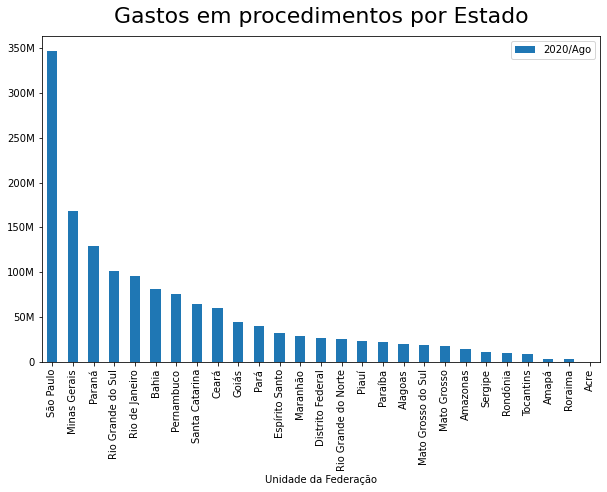

In [46]:
datasus["2020/Ago"].sort_values(ascending=False).plot(kind='bar',figsize=(10,6))
plt.title("Gastos em procedimentos por Estado", y=1.02, fontsize=22)
plt.legend()
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()